In [65]:
from sklearn import datasets

raw_wine = datasets.load_wine()

raw_wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [66]:
X = raw_wine.data
Y = raw_wine.target

In [67]:
from sklearn.model_selection import train_test_split
X_tn, X_te, Y_tn, Y_te = train_test_split(X, Y, random_state = 1)

In [68]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_tn)
standard_X_tn = scale.transform(X_tn)
standard_X_te = scale.transform(X_te)

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(standard_X_tn)
pca_X_tn = pca.transform(standard_X_tn)
pca_X_te = pca.transform(standard_X_te)


<AxesSubplot:>

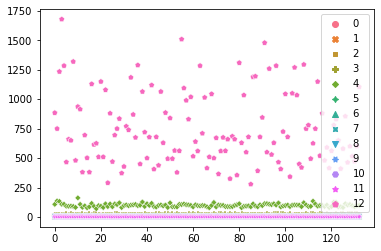

In [82]:
sns.scatterplot(data=X_tn)

In [71]:
print(standard_X_tn.shape)
print(standard_X_te.shape)

(133, 13)
(45, 13)


In [72]:
print(pca_X_tn.shape)
print(pca_X_te.shape)

(133, 2)
(45, 2)


In [73]:
print(pca.get_covariance())
pca.get_covariance().shape

[[ 1.06244198  0.05588975  0.29643474 -0.14674317  0.38769443  0.25079577
   0.19779094 -0.10070718  0.17126277  0.44742545 -0.12013532  0.02879752
   0.50505224]
 [ 0.05588975  0.86510155  0.11906446  0.23837434  0.00721146 -0.39785163
  -0.4503856   0.31716671 -0.30728109  0.30100181 -0.42357315 -0.45825394
  -0.14345856]
 [ 0.29643474  0.11906446  0.72597065 -0.01380654  0.20891722  0.02618151
  -0.01633577  0.03209892  0.00824227  0.32033554 -0.17879769 -0.10868048
   0.2307792 ]
 [-0.14674317  0.23837434 -0.01380654  0.77557799 -0.13456582 -0.4028355
  -0.42487887  0.28525095 -0.30301432  0.07431753 -0.28885443 -0.36992936
  -0.2952175 ]
 [ 0.38769443  0.00721146  0.20891722 -0.13456582  0.82428285  0.22898335
   0.19490044 -0.10843832  0.16009666  0.30262412 -0.0453494   0.06951315
   0.39222323]
 [ 0.25079577 -0.39785163  0.02618151 -0.4028355   0.22898335  1.21144743
   0.7122459  -0.47784458  0.50827447 -0.11953458  0.48155509  0.61862946
   0.49873766]
 [ 0.19779094 -0.450385

(13, 13)

In [74]:
print(pca.singular_values_)
print(pca.components_)

[24.81797394 18.31760391]
[[-0.10418545  0.25670612  0.01387486  0.23907587 -0.10470229 -0.4007005
  -0.42902734  0.29111343 -0.30307602  0.12127653 -0.31609521 -0.38729685
  -0.26283936]
 [-0.49018724 -0.1691503  -0.30746987  0.04459018 -0.34837302 -0.07966456
  -0.0133774  -0.02498633 -0.0415164  -0.50798383  0.26045807  0.14018631
  -0.39850143]]


In [75]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.66615023 2.54192889]
[0.35623588 0.19406282]


In [76]:
import pandas as pd
pca_columns = ['pca_comp1','pca_comp2']
pca_X_tn_df = pd.DataFrame(pca_X_tn, columns=pca_columns)
pca_X_tn_df['target'] = Y_tn
pca_X_tn_df


,pca_comp1,pca_comp2,target
0,-2.231848,-0.148603,0
1,-1.364444,0.422617,1
2,-1.918072,-2.014682,0
3,-3.539272,-2.878394,0
4,-3.182320,-2.020041,0
...,...,...,...
128,1.995535,-0.227742,2
129,3.785334,-0.303041,2
130,0.530538,1.093638,1
131,2.625701,-0.163952,2


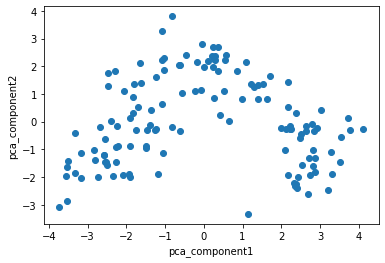

In [77]:
import matplotlib.pyplot as plt
plt.scatter(pca_X_tn_df['pca_comp1'], pca_X_tn_df['pca_comp2'], marker='o')
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

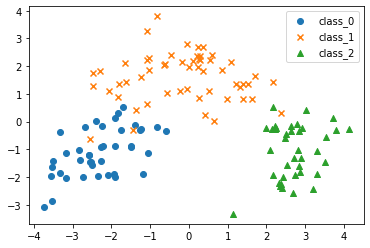

(133, 3)

In [81]:
df = pca_X_tn_df
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]
df_2 = df[df['target'] == 2]

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']

target_0 = raw_wine.target_names[0]
target_1 = raw_wine.target_names[1]
target_2 = raw_wine.target_names[2]

plt.scatter(X_11, X_21, marker='o', label=target_0)
plt.scatter(X_12, X_22, marker='x', label=target_1)
plt.scatter(X_13, X_23, marker='^', label=target_2)
plt.legend()
plt.show()

<AxesSubplot:xlabel='pca_comp1', ylabel='pca_comp2'>

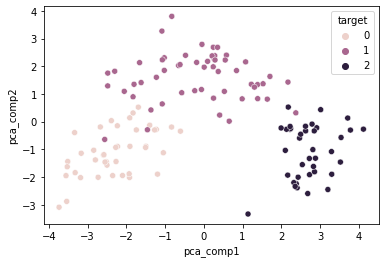

In [85]:
import seaborn as sns
sns.scatterplot(data=df, x='pca_comp1', y='pca_comp2', hue='target')
